In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\peter\Desktop\Internship\Stats.csv")

In [3]:
df.head()

,Date,RepPosPer,RepNegPer,DemPosPer,DemNegPer,TrumpRating,BidenRating
0,1/07/2020,0.361956,0.490198,0.098955,0.048891,0.403,0.497
1,2/07/2020,0.412111,0.459101,0.077376,0.051413,0.400,0.493
2,3/07/2020,0.479208,0.430253,0.048030,0.042510,0.405,0.493
3,4/07/2020,0.535767,0.379203,0.042914,0.042116,0.409,0.496
4,5/07/2020,0.432357,0.433766,0.077119,0.056757,0.409,0.496


In [4]:
print(df.dtypes)

Date            object
RepPosPer      float64
RepNegPer      float64
DemPosPer      float64
DemNegPer      float64
TrumpRating    float64
BidenRating    float64
dtype: object


In [5]:
df.describe()

,RepPosPer,RepNegPer,DemPosPer,DemNegPer,TrumpRating,BidenRating
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.394303,0.400115,0.117451,0.088130,0.422162,0.500784
std,0.046434,0.056090,0.046909,0.035378,0.009625,0.008268
min,0.286441,0.247888,0.041495,0.037621,0.400000,0.489000
25%,0.365909,0.354509,0.081614,0.062319,0.416500,0.495000
50%,0.397644,0.405673,0.107285,0.080437,0.424000,0.498000
75%,0.423174,0.437793,0.145438,0.111144,0.429000,0.507000
max,0.535767,0.520823,0.273342,0.183441,0.442000,0.521000


In [6]:
df.corr()

,RepPosPer,RepNegPer,DemPosPer,DemNegPer,TrumpRating,BidenRating
RepPosPer,1.000000,0.139983,-0.634892,-0.692609,-0.237910,-0.269560
RepNegPer,0.139983,1.000000,-0.800872,-0.707264,-0.532496,-0.327876
DemPosPer,-0.634892,-0.800872,1.000000,0.777094,0.471878,0.420316
DemNegPer,-0.692609,-0.707264,0.777094,1.000000,0.530819,0.316312
TrumpRating,-0.237910,-0.532496,0.471878,0.530819,1.000000,0.287299
BidenRating,-0.269560,-0.327876,0.420316,0.316312,0.287299,1.000000


In [44]:
df.corr().to_csv(r"C:\Users\peter\Desktop\Internship\corr.csv")

In [47]:
df2 = pd.read_csv(r"C:\Users\peter\Desktop\Internship\corr.csv")
df2

,Features,TrumpRating,TR P-value,BidenRating,BR P-value
0,RepPosPer,-0.237910,1.192438e-02,-0.269560,0.004223
1,RepNegPer,-0.532496,1.800000e-09,-0.327876,0.000443
2,DemPosPer,0.471878,1.710000e-07,0.420316,0.000004
3,DemNegPer,0.530819,2.060000e-09,0.316312,0.000719


<AxesSubplot:xlabel='RepNegPer', ylabel='TrumpRating'>

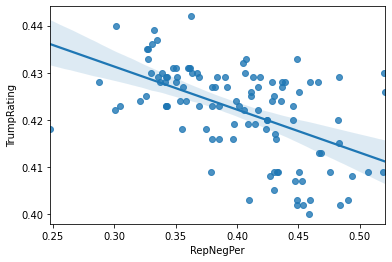

In [7]:
sns.regplot(x="RepNegPer", y="TrumpRating", data=df)

<AxesSubplot:xlabel='RepNegPer', ylabel='TrumpRating'>

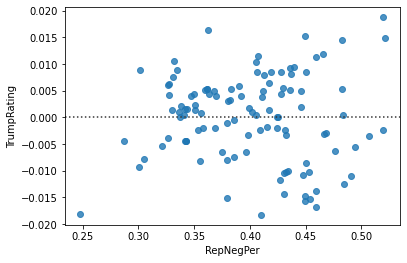

In [8]:
sns.residplot(x="RepNegPer", y="TrumpRating", data=df)

<AxesSubplot:xlabel='DemNegPer', ylabel='TrumpRating'>

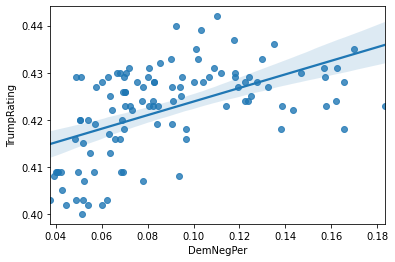

In [9]:
sns.regplot(x="DemNegPer", y="TrumpRating", data=df)

<AxesSubplot:xlabel='DemNegPer', ylabel='TrumpRating'>

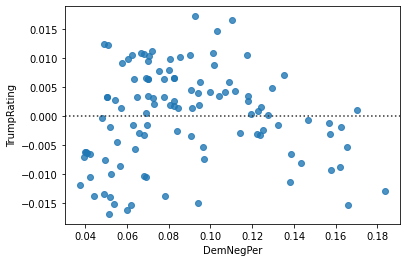

In [10]:
sns.residplot(x="DemNegPer", y="TrumpRating", data=df)

In [11]:
pearson_coef, p_value = stats.pearsonr(df['RepPosPer'], df['TrumpRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.23790987785156814  with a P-value of P = 0.011924375944301194


In [12]:
pearson_coef, p_value = stats.pearsonr(df['RepNegPer'], df['TrumpRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5324962400221109  with a P-value of P = 1.7950803398551107e-09


In [13]:
pearson_coef, p_value = stats.pearsonr(df['DemPosPer'], df['TrumpRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4718781339598122  with a P-value of P = 1.712734965923316e-07


In [14]:
pearson_coef, p_value = stats.pearsonr(df['DemNegPer'], df['TrumpRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5308185892802513  with a P-value of P = 2.0617467330796666e-09


In [15]:
pearson_coef, p_value = stats.pearsonr(df['RepPosPer'], df['BidenRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.269559806520778  with a P-value of P = 0.004223088190939446


In [16]:
pearson_coef, p_value = stats.pearsonr(df['RepNegPer'], df['BidenRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.32787553738950104  with a P-value of P = 0.0004432294573348107


In [17]:
pearson_coef, p_value = stats.pearsonr(df['DemPosPer'], df['BidenRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.42031622824044257  with a P-value of P = 4.37423363306262e-06


In [18]:
pearson_coef, p_value = stats.pearsonr(df['DemNegPer'], df['BidenRating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.31631164466592443  with a P-value of P = 0.0007193409289399342


In [43]:
lm = LinearRegression()
lm.fit(df[['RepNegPer']], df['TrumpRating'])
print('The R-square is: ', lm.score(df[['RepNegPer']], df['TrumpRating']))

The R-square is:  0.28355224563768566


Since the p-value is  <  0.05, the correlation is statistically significant, although the linear relationship isn't extremely strong.

In [20]:
lmT = LinearRegression()
lmB = LinearRegression()
Z = df[['RepPosPer', 'RepNegPer', 'DemPosPer', 'DemNegPer']]

In [21]:
lmT.fit(Z, df['TrumpRating'])
print(lmT.intercept_)
print(lmT.coef_)
print('The R-square is: ', lmT.score(Z, df['TrumpRating']))

174272.325717154
[-174271.88588039 -174271.94595662 -174271.90038256 -174271.79433817]
The R-square is:  0.3326643545722493


TrumpRating = 174272.33 + (-174271.89RepPosPer) + (-174271.95RepNegPer) + (-174271.90DemPosPer) + (-174271.79DemNegPer)

In [22]:
lmB.fit(Z, df['BidenRating'])
print(lmB.intercept_)
print(lmB.coef_)
print('The R-square is: ', lmB.score(Z, df['BidenRating']))

8677.91903525246
[-8677.42830471 -8677.42546997 -8677.34849478 -8677.43346404]
The R-square is:  0.17706002606269378


BidenRating = 8677.92 + (-8677.43RepPosPer) + (-8677.43RepNegPer) + (-8677.35DemPosPer) + (-8677.43DemNegPer)

Text(0, 0.5, 'Count')

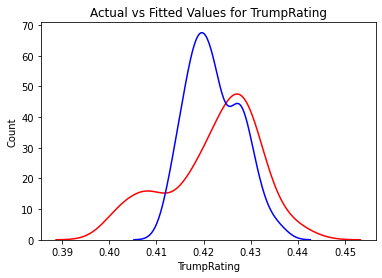

In [23]:
Y_hat = lmT.predict(Z)

plt.figure

ax1 = sns.kdeplot(df['TrumpRating'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values", ax = ax1)


plt.title('Actual vs Fitted Values for TrumpRating')
plt.xlabel('TrumpRating')
plt.ylabel('Count')

In [24]:
mse = mean_squared_error(df['TrumpRating'], Y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  6.126911415179986e-05


Text(0, 0.5, 'Count')

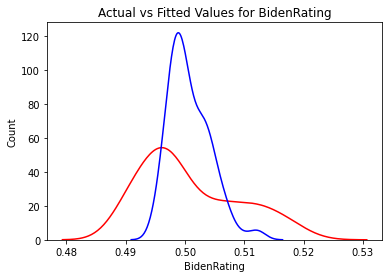

In [25]:
Y_hat = lmB.predict(Z)

plt.figure

ax1 = sns.kdeplot(df['BidenRating'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values", ax = ax1)


plt.title('Actual vs Fitted Values for BidenRating')
plt.xlabel('BidenRating')
plt.ylabel('Count')

In [26]:
mse = mean_squared_error(df['BidenRating'], Y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  5.574351326746118e-05


In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Ratings')

In [28]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [29]:
Z_pr=pr.fit_transform(Z)

In [30]:
Z.shape

(111, 4)

In [31]:
Z_pr.shape

(111, 15)

In [32]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [33]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
pipe.fit(Z, df['TrumpRating'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [35]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([0.41497984, 0.41291225, 0.40681797, 0.41201792])

Text(0, 0.5, 'Count')

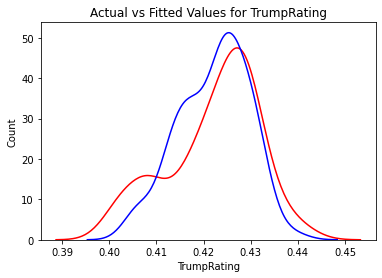

In [36]:
plt.figure

ax1 = sns.kdeplot(df['TrumpRating'], color="r", label="Actual Value")
sns.kdeplot(ypipe, color="b", label="Fitted Values", ax = ax1)


plt.title('Actual vs Fitted Values for TrumpRating')
plt.xlabel('TrumpRating')
plt.ylabel('Count')

In [37]:
r_squared = r2_score(df['TrumpRating'], ypipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.5926637917946449


In [38]:
mean_squared_error(df['TrumpRating'], ypipe)

3.739816509081891e-05

In [39]:
pipe.fit(Z, df['BidenRating'])
ypipe=pipe.predict(Z)

Text(0, 0.5, 'Count')

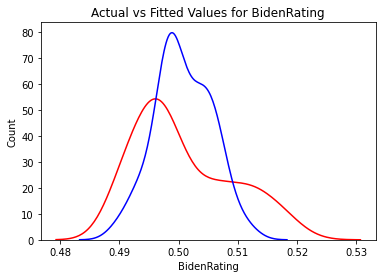

In [40]:
plt.figure

ax1 = sns.kdeplot(df['BidenRating'], color="r", label="Actual Value")
sns.kdeplot(ypipe, color="b", label="Fitted Values", ax = ax1)


plt.title('Actual vs Fitted Values for BidenRating')
plt.xlabel('BidenRating')
plt.ylabel('Count')

In [41]:
r_squared = r2_score(df['BidenRating'], ypipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.335899137194287


In [42]:
mean_squared_error(df['BidenRating'], ypipe)

4.498422294353502e-05